# Transfer Learning- Cat Vs Non Cat Classifier
In this project, will be using pre-trained VGG16 models which were trained to classify a large set of images, and fine-tune it to make the classifier specific to our classification task of cats vs non-cats.

##### About the Dataset
Dataset is in .h5 file. It contains:

train_catvnoncat.h5 - a training set of images labeled as cat (y=1) or non-cat (y=0)

test_catvnoncat.h5 - a test set of images labeled as cat or non-cat

Each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

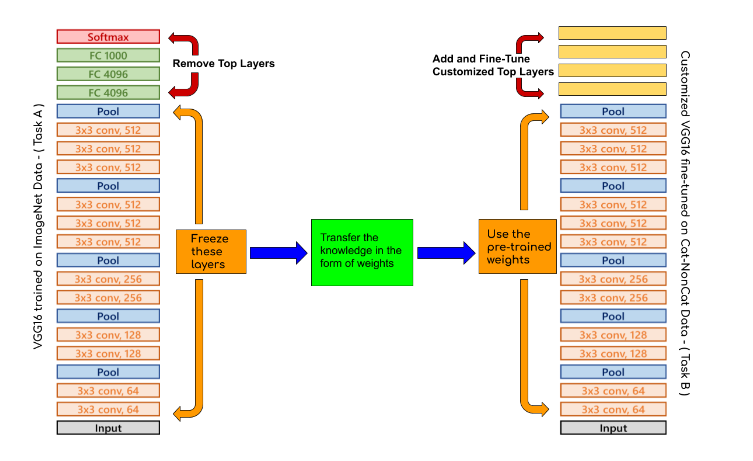

# About the VGG16 model

The VGG16 is a trained CNN primarily built to classify 1000 classes of the ImageNet database.
It is built by using roughly 1.2 million training images, 50,000 validation images, and 150,000 testing images.
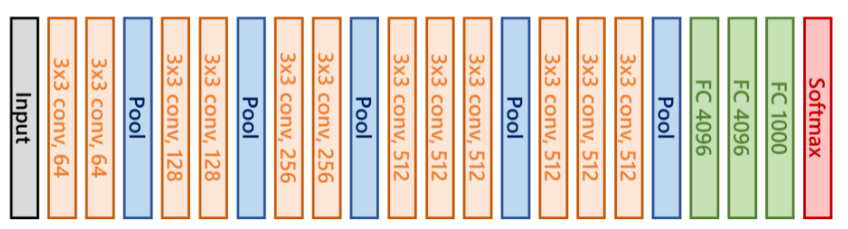

# Importing the Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import tensorflow
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
np.random.seed(42)
tensorflow.random.set_seed(42)

import os 
os.environ["HDF5_USE_FILE_LOCKING"]="FALSE"

# Loading the Data

In [2]:
train_dataset = h5py.File('/kavyapan/datasets/project/cat-non-cat/train_catvnoncat.h5', "r")

test_dataset = h5py.File('/kavyapan/datasets/project/cat-non-cat/test_catvnoncat.h5', "r")

print("File format of train_dataset:",train_dataset)
print("File format of test_dataset:",test_dataset)

File format of train_dataset: <HDF5 file "train_catvnoncat.h5" (mode r)>
File format of test_dataset: <HDF5 file "test_catvnoncat.h5" (mode r)>


In [5]:
# Storing the data in form of numpy array
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels

test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels

# Data Exploration

Classes are:  [b'non-cat' b'cat']
Groundtruth stored as:  1
cat


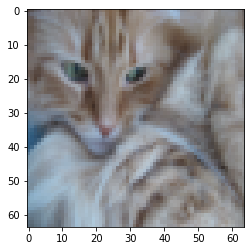

In [13]:
# Visulaizing the data
classes = np.array(test_dataset["list_classes"][:])

print("Classes are: ",classes)
print("Groundtruth stored as: ",train_set_y_orig[2])
print(classes[train_set_y_orig[2]].decode('utf-8'))

plt.imshow(train_set_x_orig[2])

In [16]:
validation_x = test_set_x_orig[:25]
validation_y = test_set_y_orig[:25]

test_set_x = test_set_x_orig[25:]
test_set_y = test_set_y_orig[25:]

print("train_set_x shape: ", train_set_x_orig.shape)
print("train_set_y shape: ", train_set_y_orig.shape)

print("Validation data size: ", validation_x.shape)
print("Validation data size: ", validation_y.shape)

print("test_set_x shape: ", test_set_x.shape)
print("test_set_y shape: ", test_set_y.shape)

train_set_x shape:  (209, 64, 64, 3)
train_set_y shape:  (209,)
Validation data size:  (25, 64, 64, 3)
Validation data size:  (25,)
test_set_x shape:  (25, 64, 64, 3)
test_set_y shape:  (25,)


# Getting Pre-trained VGC16 model

In [30]:
# Weights of the pre-trained VGC16 model

vgg_base = VGG16(weights='imagenet', include_top=False)

vgg_base.trainable=False

58900480/58889256 [==============================] - 1s 0us/step


# Customizing the VGC16 model

In [35]:
# Creating the input layer
inp = Input(shape=(64, 64, 3), name='image_input')

#initiate a model
vgg_model = Sequential()

#Adding the VGG base model
vgg_model.add(vgg_base)

#Adding the dense layers which will be trained 
vgg_model.add(GlobalAveragePooling2D())

vgg_model.add(Dense(1024,activation='relu'))
vgg_model.add(Dropout(0.6))

vgg_model.add(Dense(512,activation='relu'))
vgg_model.add(Dropout(0.5))

vgg_model.add(Dense(1024,activation='relu'))
vgg_model.add(Dropout(0.4))

vgg_model.add(Dense(1024,activation='relu'))
vgg_model.add(Dropout(0.3))

vgg_model.add(Dense(1, activation='sigmoid'))

# Compiling the VGG16 model

In [41]:
sgd = SGD(learning_rate = 0.025)
vgg_model.compile(loss = 'binary_crossentropy', optimizer = sgd, metrics = ['accuracy'])

# Training the top layers(Fine-Tuning)

In [47]:
vgg_model.fit(train_set_x_orig, train_set_y_orig, epochs=5, verbose=1, validation_data=(validation_x, validation_y))

Epoch 1/5
7/7 [==============================] - 4s 607ms/step - loss: 0.1829 - accuracy: 0.9378 - val_loss: 0.1840 - val_accuracy: 0.8800
Epoch 2/5
7/7 [==============================] - 4s 586ms/step - loss: 0.0795 - accuracy: 0.9761 - val_loss: 0.1628 - val_accuracy: 0.8800
Epoch 3/5
7/7 [==============================] - 4s 554ms/step - loss: 0.0877 - accuracy: 0.9713 - val_loss: 0.1660 - val_accuracy: 0.8800
Epoch 4/5
7/7 [==============================] - 4s 519ms/step - loss: 0.0828 - accuracy: 0.9569 - val_loss: 0.1911 - val_accuracy: 0.8800
Epoch 5/5
7/7 [==============================] - 4s 521ms/step - loss: 0.0696 - accuracy: 0.9713 - val_loss: 0.1426 - val_accuracy: 0.9600


# Evaluating the model

In [50]:
vgg_model_loss, vgg_model_acc = vgg_model.evaluate(test_set_x_orig,test_set_y_orig)
print('Test accuracy using VGG16 model as the base:', vgg_model_acc)

2/2 [==============================] - 1s 267ms/step - loss: 0.2954 - accuracy: 0.9000
Test accuracy using VGG16 model as the base: 0.8999999761581421


# Visualizing the model

In [54]:
vgg_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

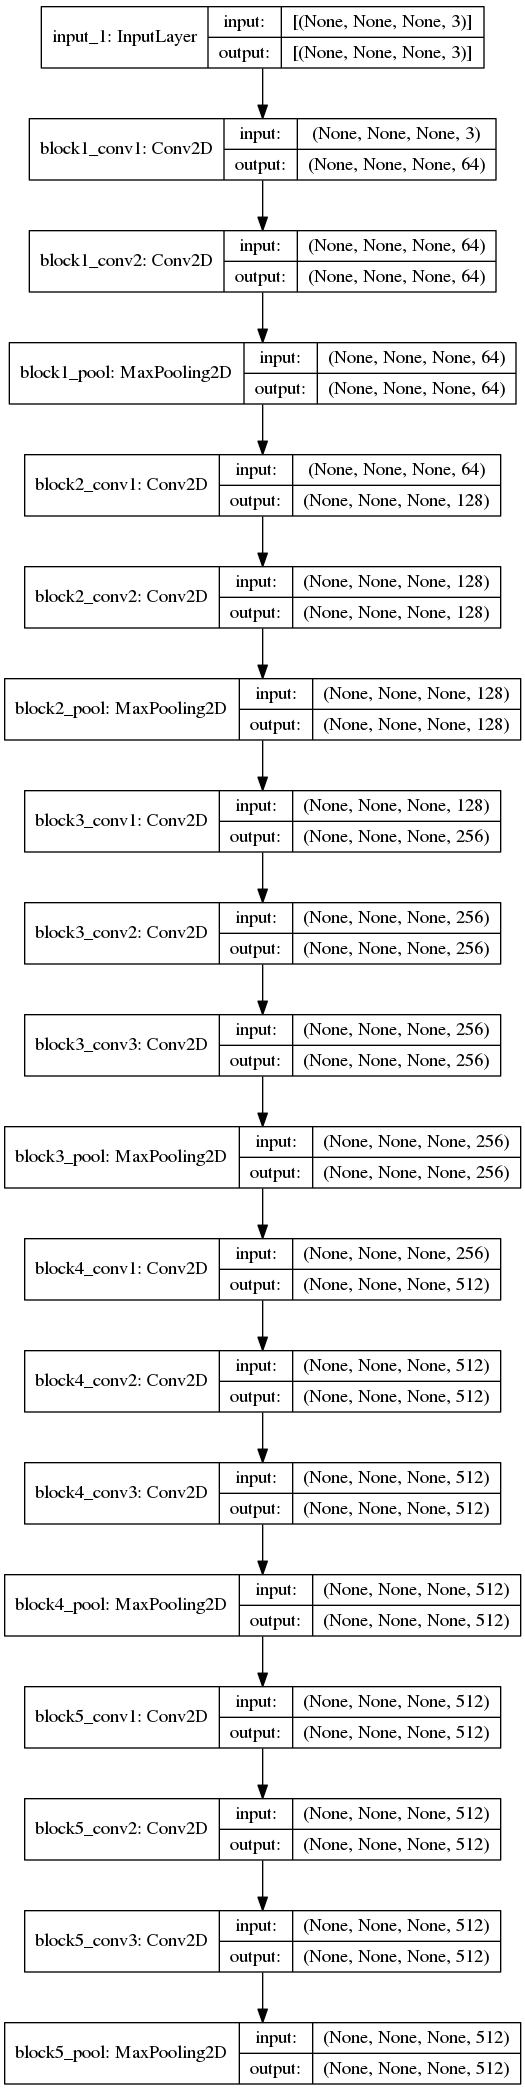

In [55]:
from tensorflow.keras.utils import plot_model

plot_model(vgg_base, show_shapes=True, show_layer_names=True)

In [56]:
vgg_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              525312    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              5

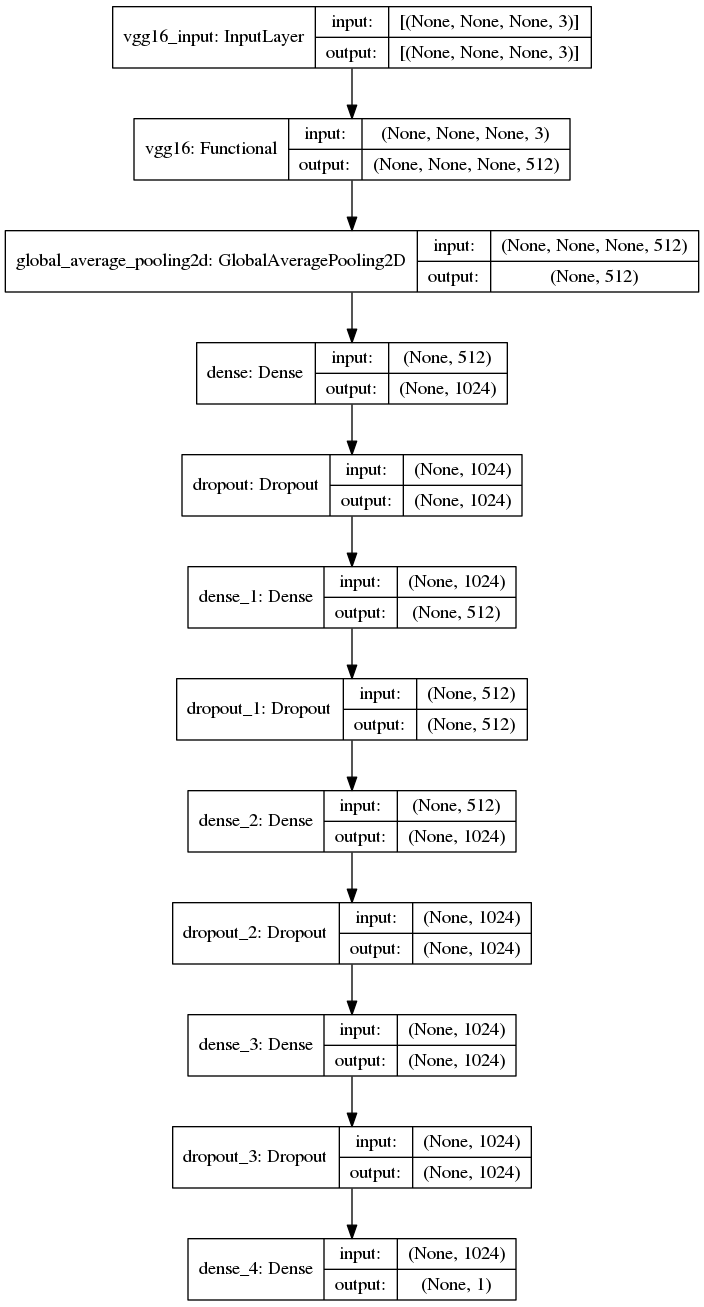

In [57]:
plot_model(vgg_model, show_shapes=True, show_layer_names=True)